# Assignment
In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:

`postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'`

The dataset needs some preprocessing. So, apply the following code before working with the dataset:

`# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]`

`# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)`

`# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)`

Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.

1. Apply GMM to the heart disease data by setting n_components=2. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?

2. GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

* full: This is the default. Each component has its own general covariance matrix.
* tied: All components share the same general covariance matrix.
* diag: Each component has its own diagonal covariance matrix.
* spherical: Each component has its own single variance.

Try all of these. Which one does perform better in terms of ARI and silhouette scores?

In [15]:
%reload_ext nb_black

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"


engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

heartdisease_df = pd.read_sql_query("select * from heartdisease", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()


# The dataset needs some preprocessing.
# So, apply the following code before working with the dataset:

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace="?", value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 1. Apply GMM to the heart disease data by setting n_components=2. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?

In [17]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=33)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

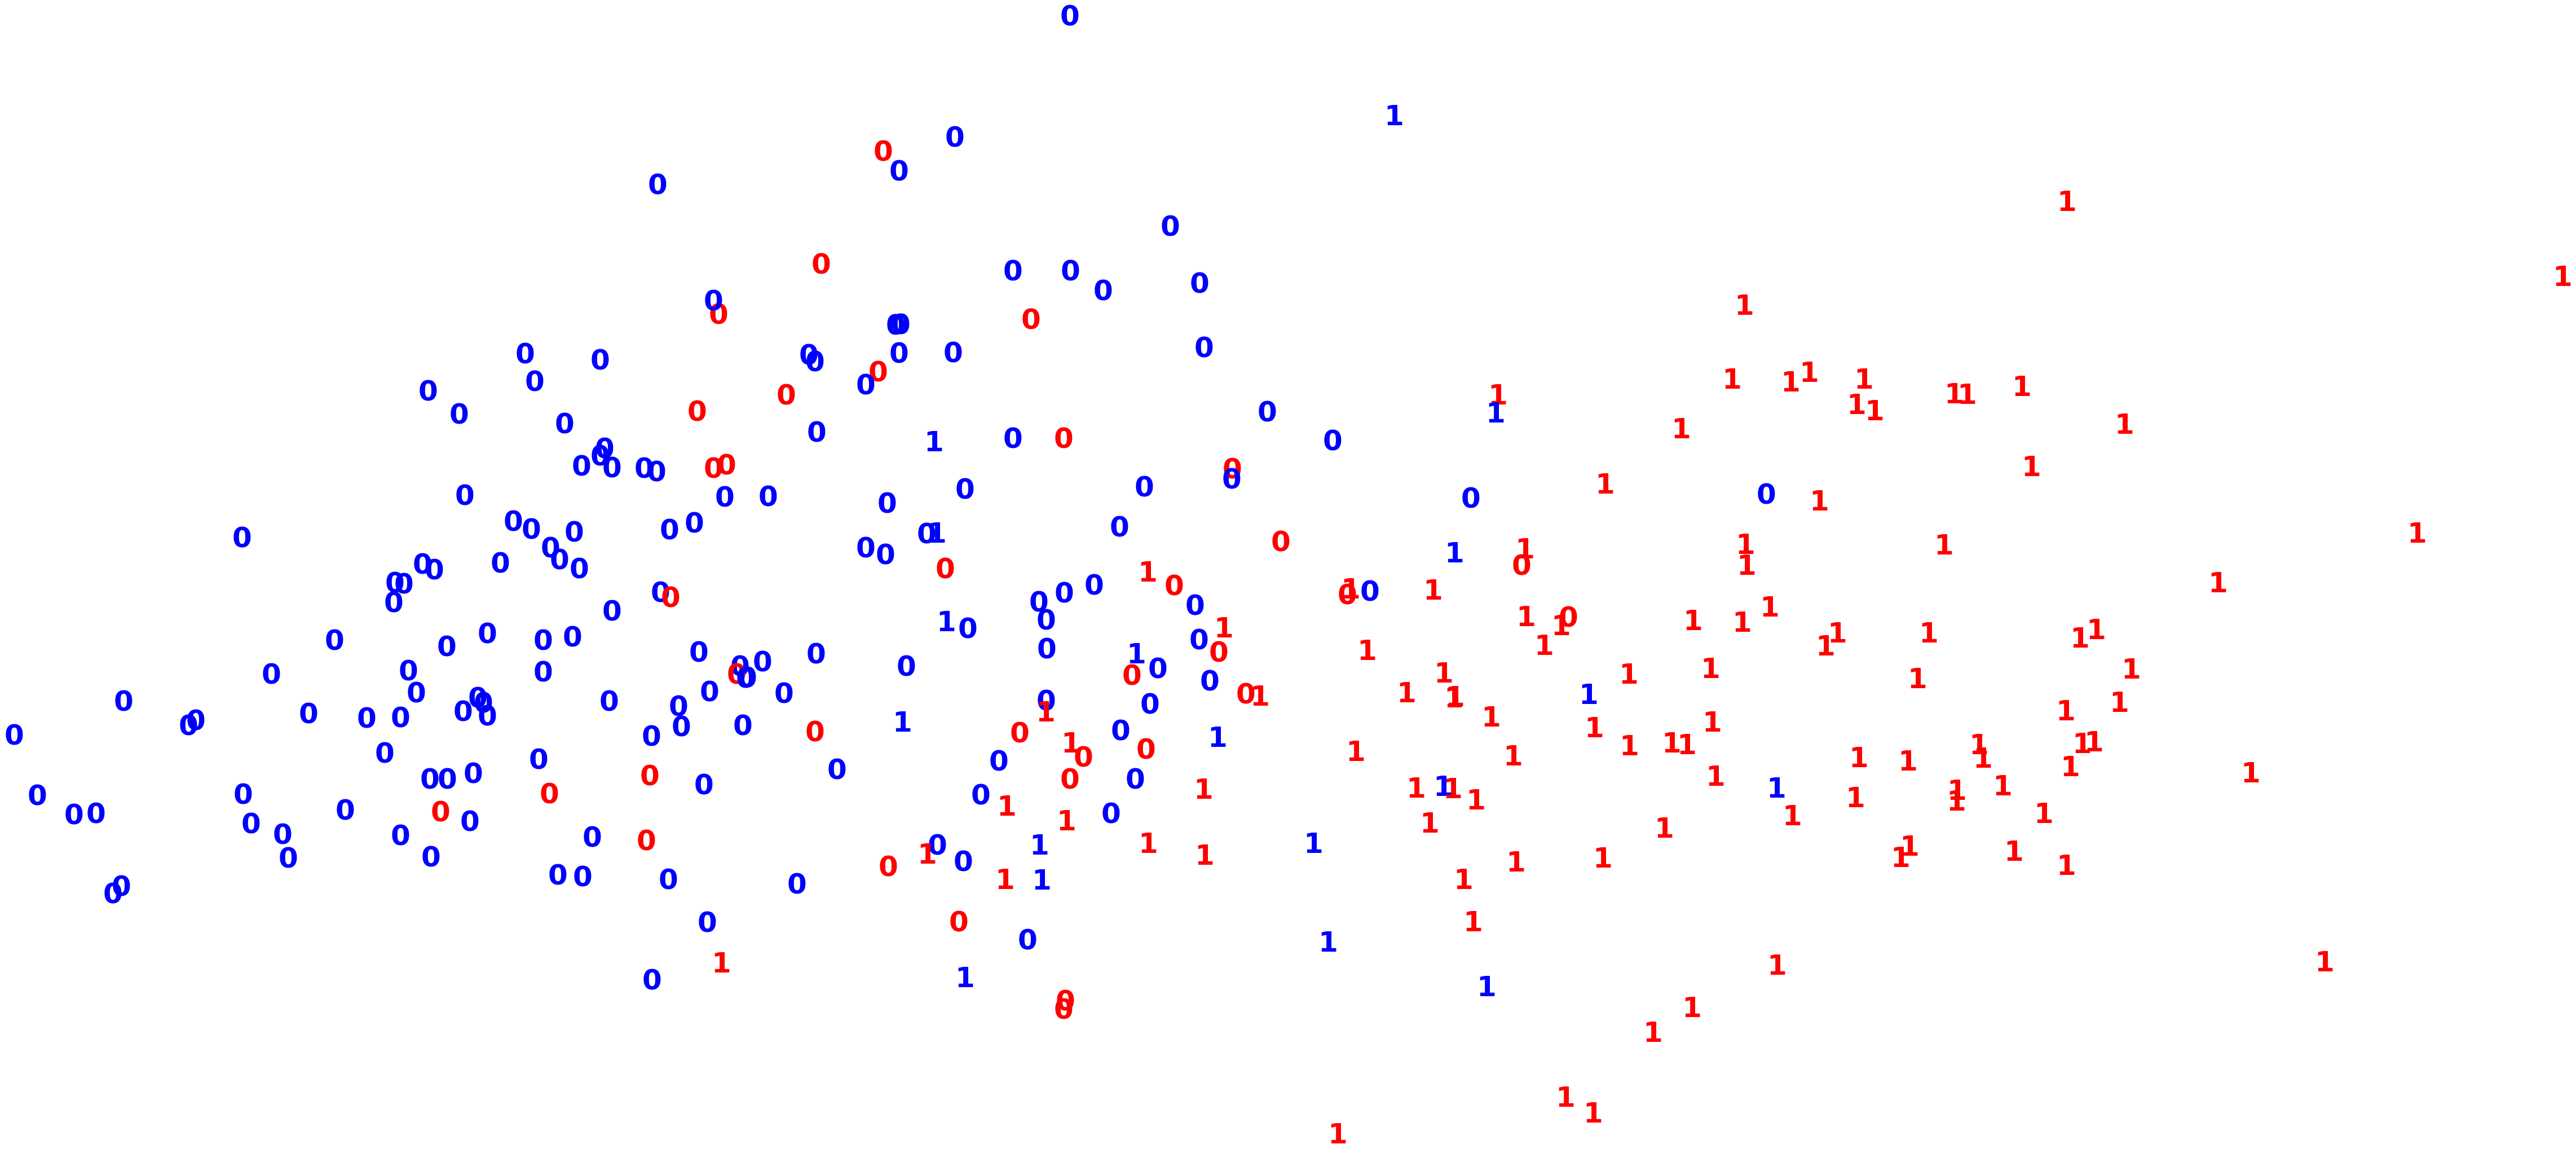

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

In [19]:
print(
    "Adjusted Rand Index of the GMM solution: {}".format(
        metrics.adjusted_rand_score(y, clusters)
    )
)
print(
    "The silhoutte score of the GMM solution: {}".format(
        metrics.silhouette_score(X_std, clusters, metric="euclidean")
    )
)

Adjusted Rand Index of the GMM solution: 0.4207322145049338
The silhoutte score of the GMM solution: 0.16118591340148433


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

K-means had an ARI of 0.445 and a silhouette score of 0.176, so this doesn't perform quite as well as K-means.  Agglomerative clustering with Ward linkage gave an ARI of 0.154 and a silhoutte score of 0.14.  GMM outperforms agglomerative clustering.  DBSCAN really shanked it with an ARI of 0.0139 and a silhouette score of 0.189. GMM does way better on the ARI, but more poorly with the silhouette than DBSCAN.  

### 2. GMM implementation of scikit-learn has a parameter called covariance_type. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

* full: This is the default. Each component has its own general covariance matrix.
* tied: All components share the same general covariance matrix.
* diag: Each component has its own diagonal covariance matrix.
* spherical: Each component has its own single variance.

Try all of these. Which one does perform better in terms of ARI and silhouette scores?

**covariance_type = 'tied'**

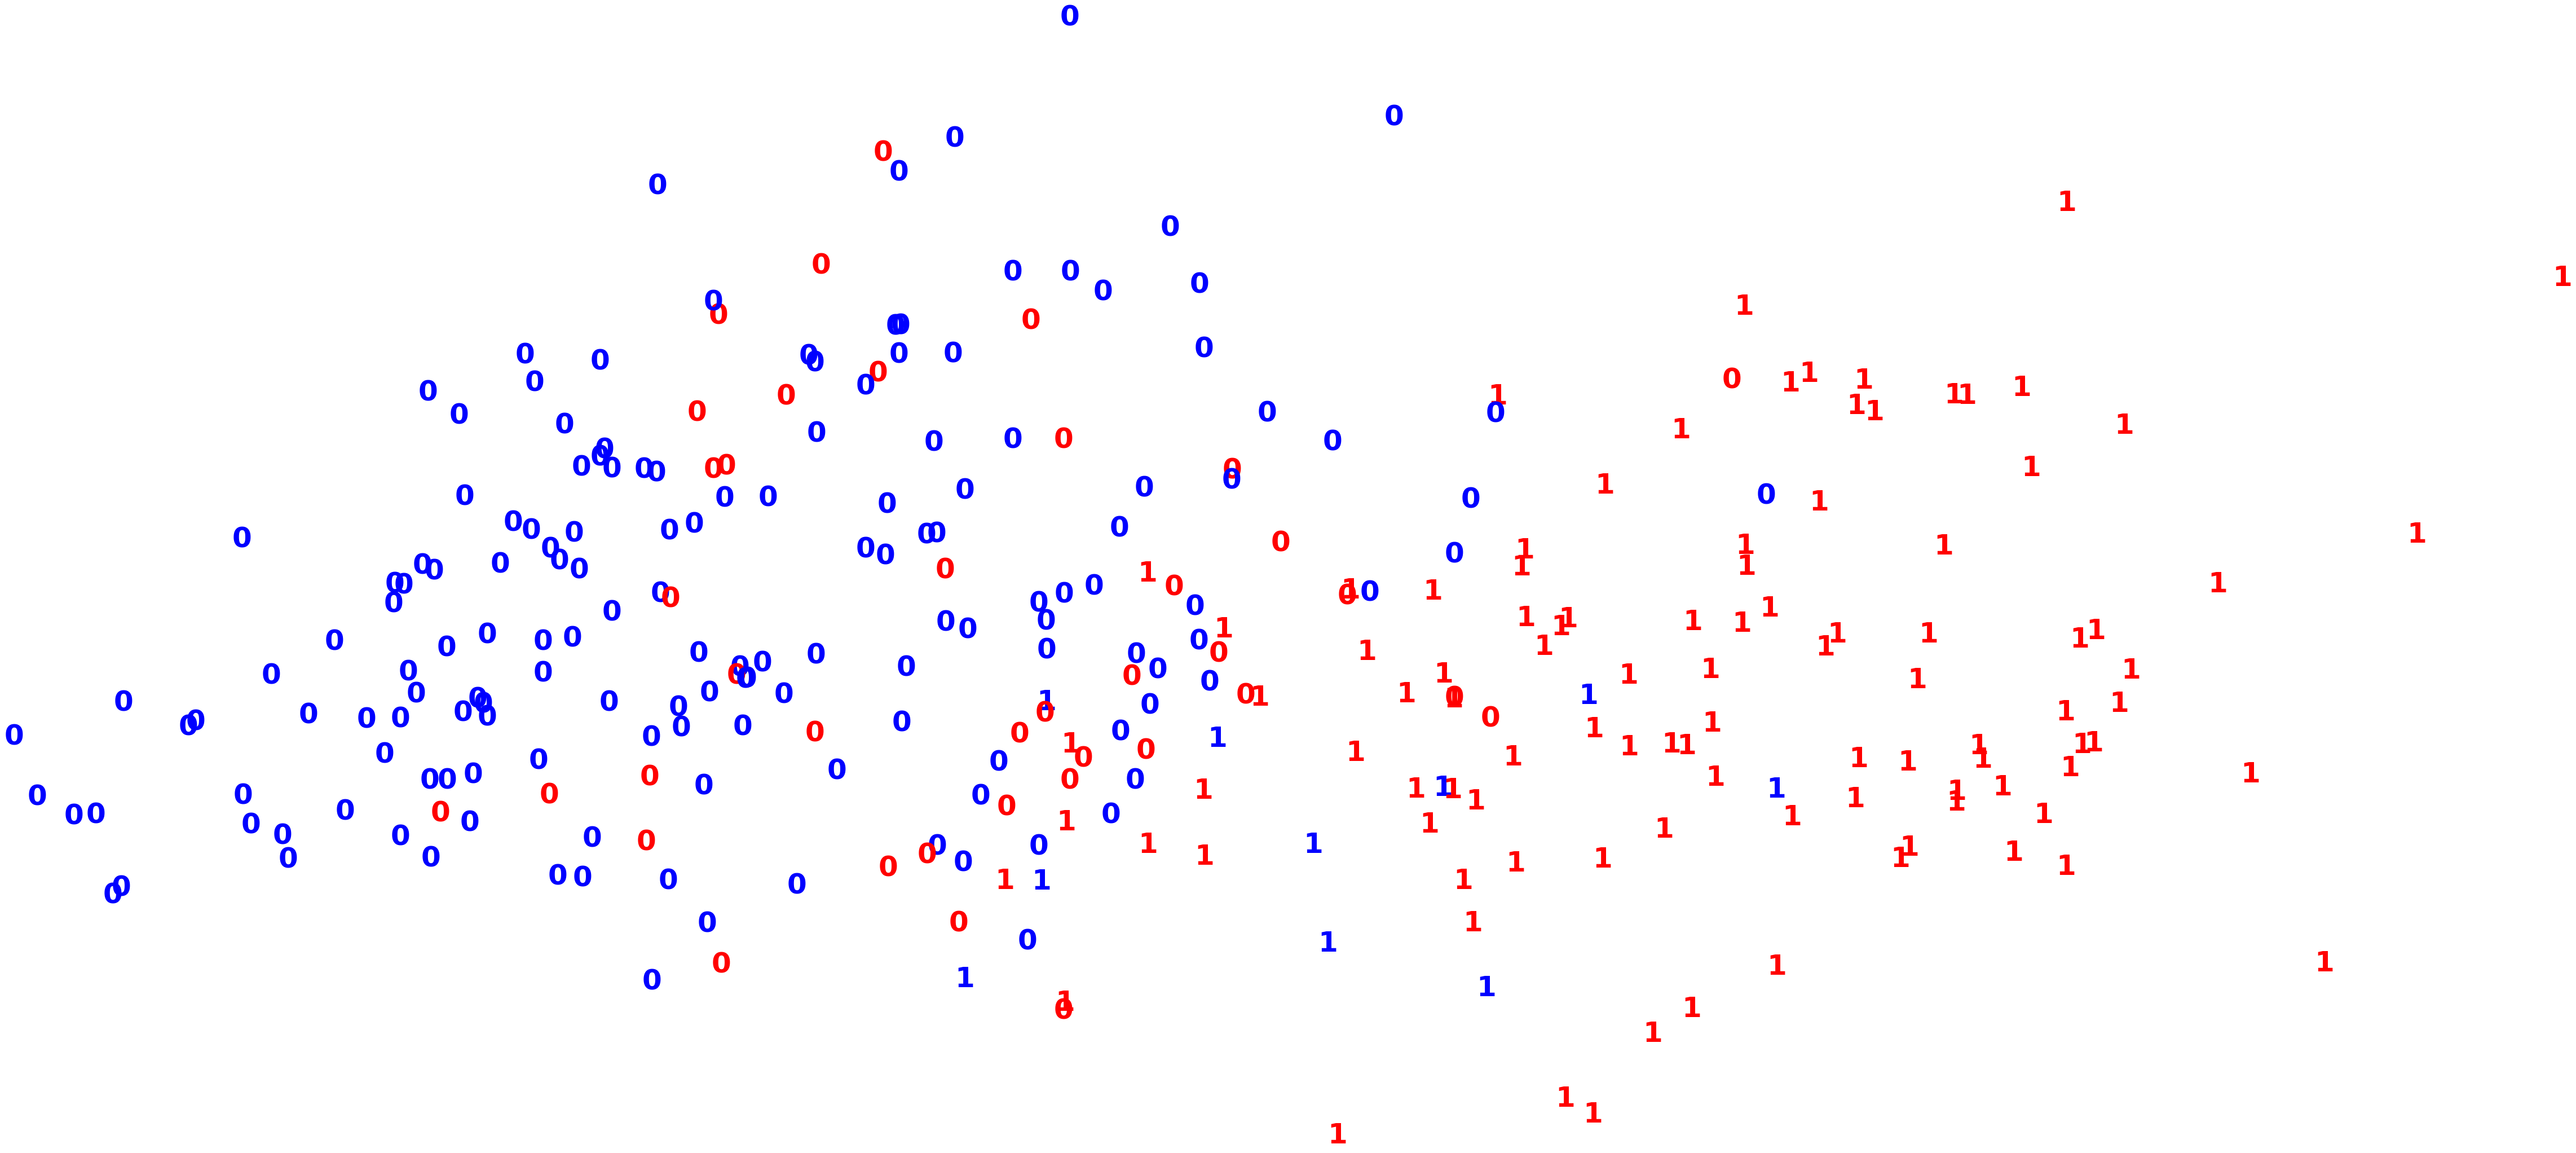

Adjusted Rand Index of the GMM solution: 0.4558104186161976
The silhoutte score of the GMM solution: 0.1671559472293439


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, covariance_type="tied", random_state=33)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

print(
    "Adjusted Rand Index of the GMM solution: {}".format(
        metrics.adjusted_rand_score(y, clusters)
    )
)
print(
    "The silhoutte score of the GMM solution: {}".format(
        metrics.silhouette_score(X_std, clusters, metric="euclidean")
    )
)

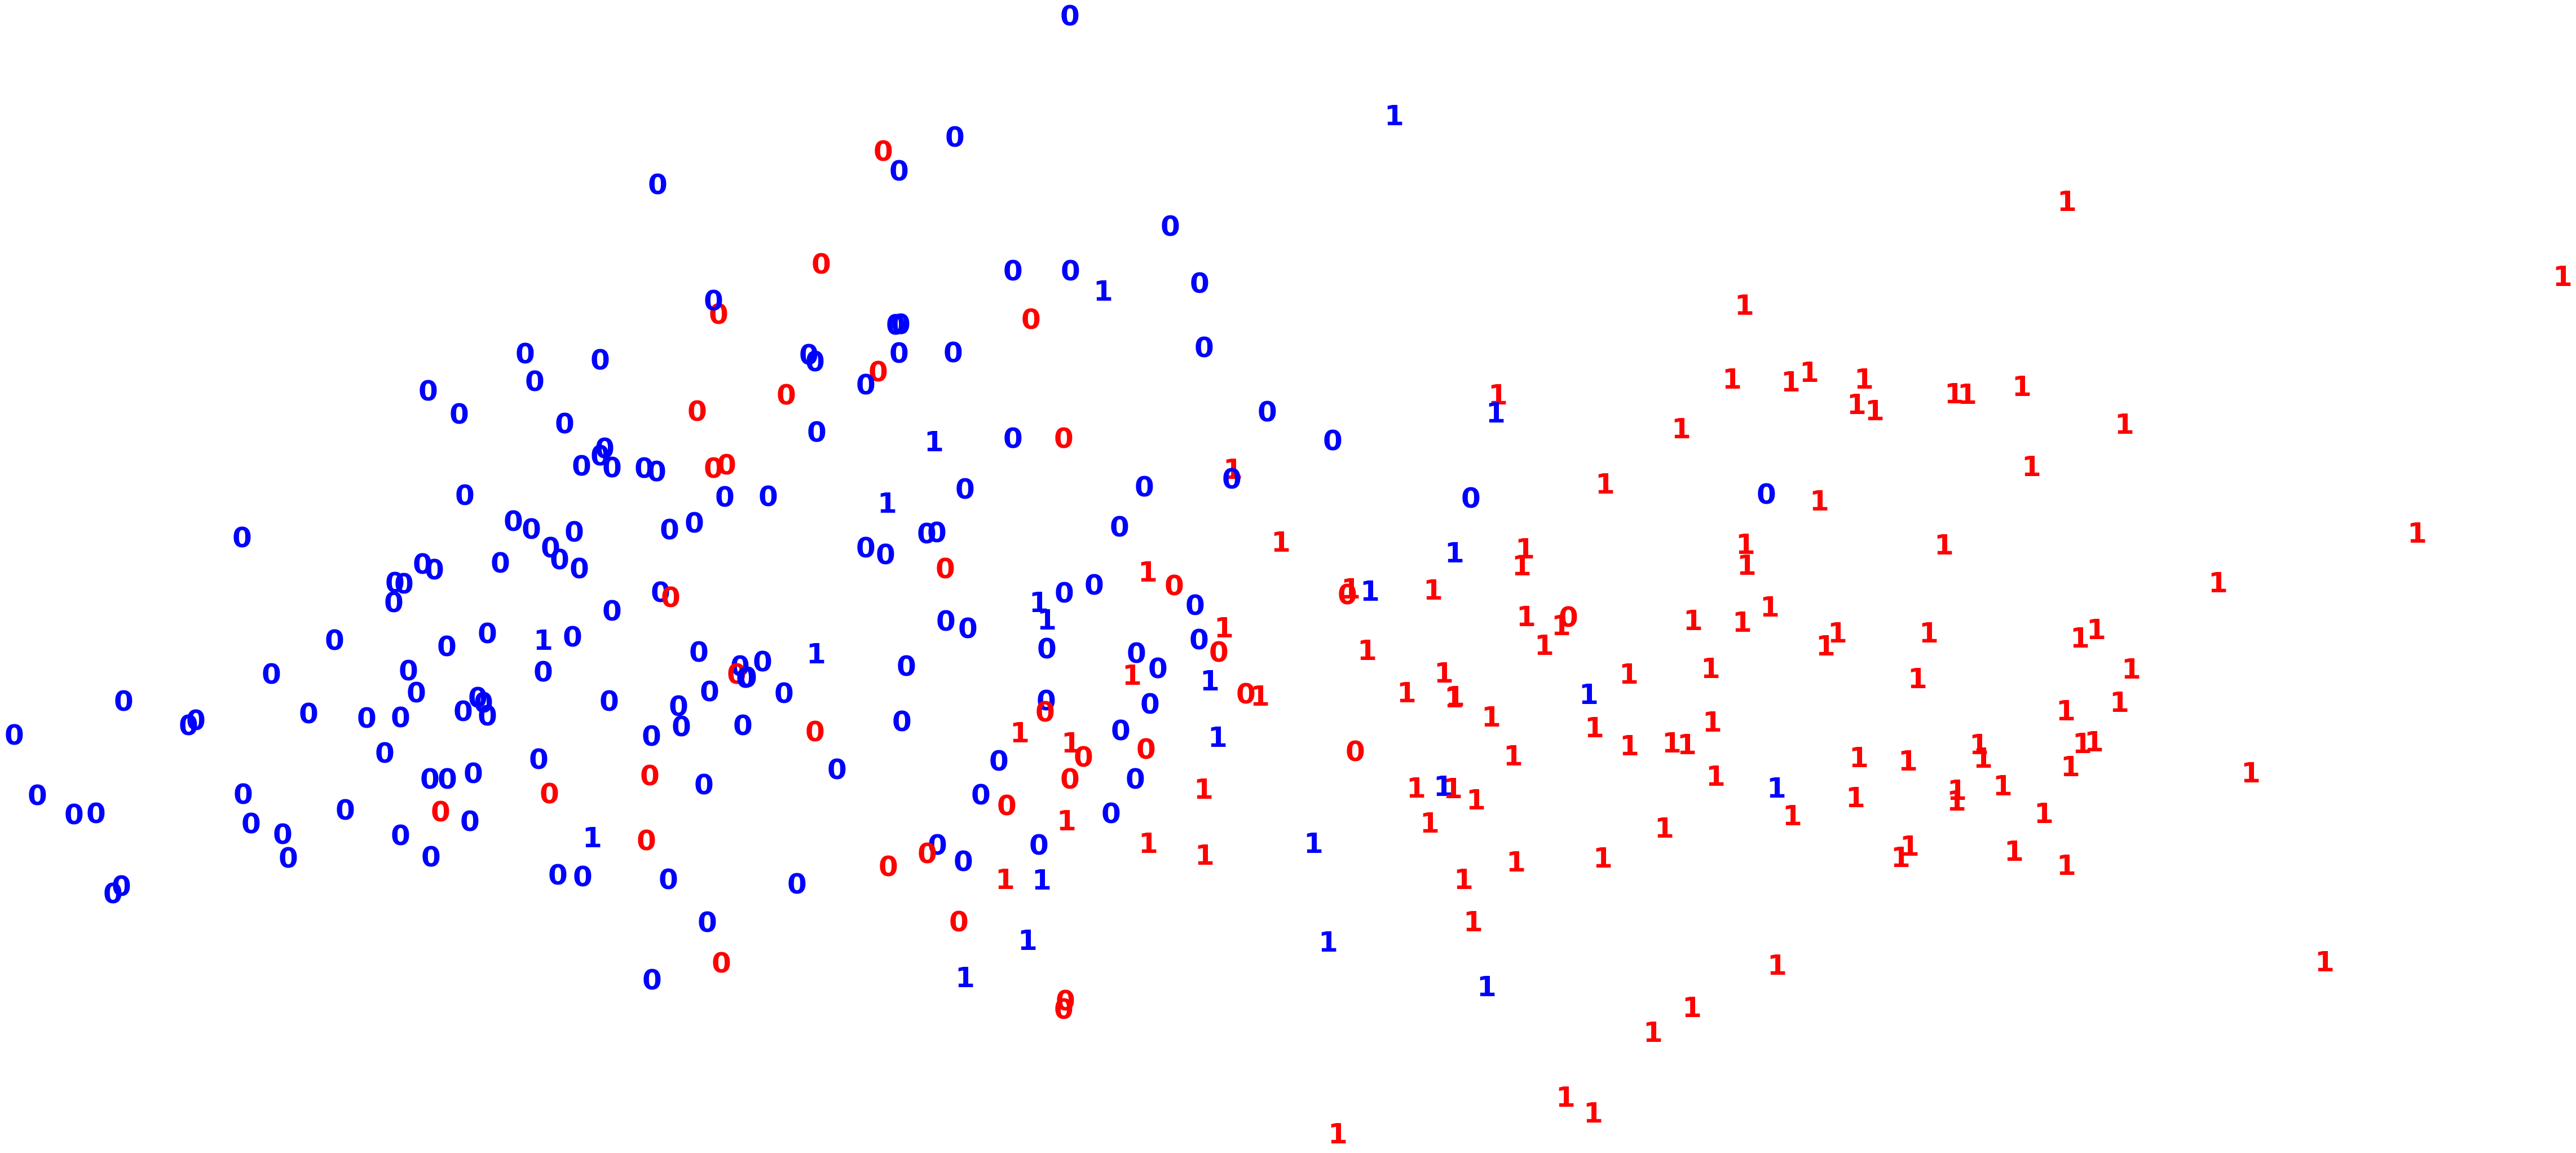

Adjusted Rand Index of the GMM solution: 0.37878842718089933
The silhoutte score of the GMM solution: 0.15836933745078682


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, covariance_type="diag", random_state=33)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

print(
    "Adjusted Rand Index of the GMM solution: {}".format(
        metrics.adjusted_rand_score(y, clusters)
    )
)
print(
    "The silhoutte score of the GMM solution: {}".format(
        metrics.silhouette_score(X_std, clusters, metric="euclidean")
    )
)

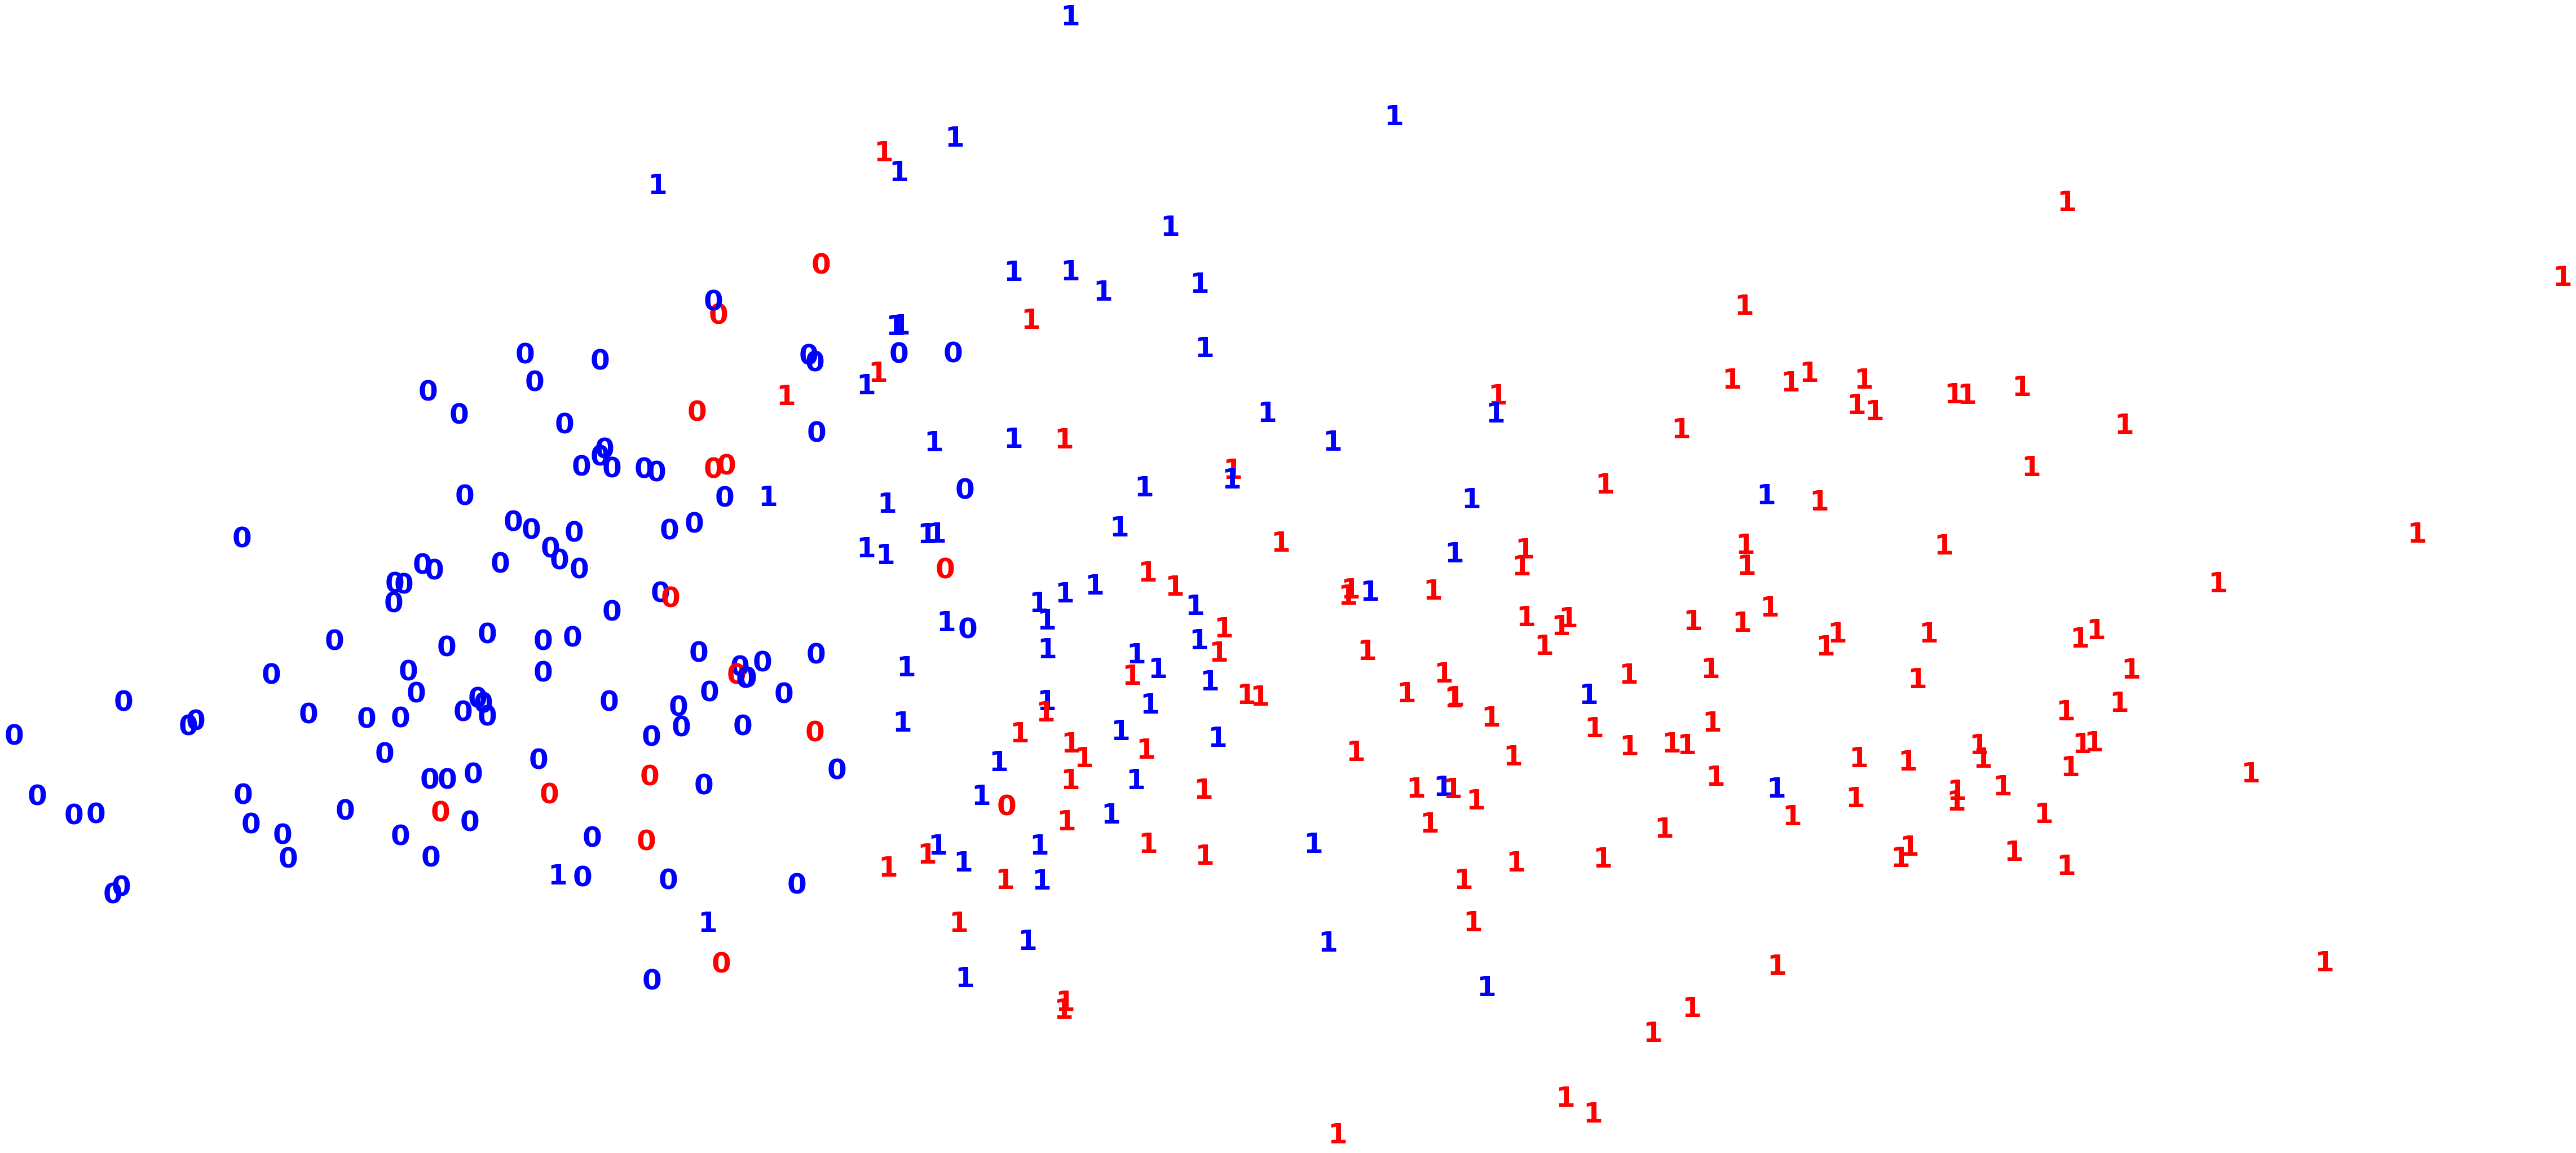

Adjusted Rand Index of the GMM solution: 0.20765243525722465
The silhoutte score of the GMM solution: 0.12468753110276873


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(
    n_components=2, covariance_type="spherical", random_state=33
)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

print(
    "Adjusted Rand Index of the GMM solution: {}".format(
        metrics.adjusted_rand_score(y, clusters)
    )
)
print(
    "The silhoutte score of the GMM solution: {}".format(
        metrics.silhouette_score(X_std, clusters, metric="euclidean")
    )
)

The covariance type with the best ARI and silhouette score is the 'tied' type.